<a href="https://colab.research.google.com/github/daniribeirof/UB_DS-ML_Capstone-project_Bicing-predictions/blob/main/03_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required libraries:

In [ ]:
import os
import pandas as pd
import numpy as np

#sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor

from sklearn import set_config
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load processed Data Frame of Bicing: 2019-2022**
All data processement can be checked on file:

[01_DF_creation_Station&Bicing_info](https://colab.research.google.com/drive/1L4QHje5e7tBrphzDqBJ0FZrVmALJmC0g?usp=sharing)


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_final.csv')

In [ ]:
df.shape

(2967415, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967415 entries, 0 to 2967414
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  int64  
 1   lat                         float64
 2   lon                         float64
 3   altitude                    float64
 4   address                     object 
 5   post_code                   int64  
 6   capacity                    int64  
 7   date                        object 
 8   year                        int64  
 9   month                       int64  
 10  day                         int64  
 11  day_of_week                 int64  
 12  hour                        int64  
 13  percentage_docks_available  float64
 14  ctx-4                       float64
 15  ctx-3                       float64
 16  ctx-2                       float64
 17  ctx-1                       float64
dtypes: float64(8), int64(8), object(2)
memory usage: 407.5+ MB


In [ ]:
df.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,4,0.72,0.68,0.73,0.74,0.72
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,9,0.58,0.67,0.63,0.62,0.61
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,14,0.75,0.62,0.67,0.74,0.75
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,19,0.65,0.76,0.72,0.69,0.68
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,2,6,0,0.59,0.66,0.68,0.66,0.59


###Test for training the model only with data from 2021 and 2022:
After some test training, we decided to continue training the model only with data for the years 2021 and 2022.

In [ ]:
df_21_22 = df.drop(df[(df['year'] == 2019) | (df['year'] == 2020)].index)

df_21_22['year'].unique()

array([2022, 2021])

In [ ]:
df_21_22.shape

(1751108, 18)

In [ ]:
df_21_22.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,4,0.72,0.68,0.73,0.74,0.72
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,9,0.58,0.67,0.63,0.62,0.61
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,14,0.75,0.62,0.67,0.74,0.75
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,19,0.65,0.76,0.72,0.69,0.68
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,2,6,0,0.59,0.66,0.68,0.66,0.59


###Test for training the model with weather data:

The notebook with weather data can be checked on file:

[05_Weather.ipynb](https://colab.research.google.com/drive/1y7tMZKz_pnfuIOPiiqTcbqdbHNBtGNey?usp=sharing)


In [ ]:
weather = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_weather.csv')

In [ ]:
weather

,date,temp,prec,wind
0,2021-01-01,6.9,10.1,2.8
1,2021-01-02,6.2,0.0,4.2
2,2021-01-03,5.6,0.0,3.6
3,2021-01-04,5.9,0.0,3.6
4,2021-01-05,5.4,0.0,3.1
...,...,...,...,...
815,2023-03-27,15.0,0.0,3.9
816,2023-03-28,14.6,0.0,4.7
817,2023-03-29,14.7,0.0,8.3
818,2023-03-30,14.0,0.0,3.3


In [ ]:
df_weather = pd.merge(df_21_22, weather, on='date', how='left')

In [ ]:
df_weather.isnull().sum()

station_id                    0
lat                           0
lon                           0
altitude                      0
address                       0
post_code                     0
capacity                      0
date                          0
year                          0
month                         0
day                           0
day_of_week                   0
hour                          0
percentage_docks_available    0
ctx-4                         0
ctx-3                         0
ctx-2                         0
ctx-1                         0
temp                          0
prec                          0
wind                          0
dtype: int64

In [ ]:
pd.Series(df_weather['prec'].unique()).sort_values().describe()

count    79.000000
mean      8.217722
std      10.106364
min       0.000000
25%       1.675000
50%       4.400000
75%      10.950000
max      50.600000
dtype: float64

In [ ]:
# # we checked that labeling precipitation has increased the correlation
# # label: rain=1, no rain=0

df_weather['prec'] = np.where(df_weather['prec'] > 1, 1, 0)

In [ ]:
df_weather['prec'].unique()

array([0, 1])

In [ ]:
df_weather.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,...,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1,temp,prec,wind
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,5,4,0.72,0.68,0.73,0.74,0.72,11.9,0,2.5
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,5,9,0.58,0.67,0.63,0.62,0.61,11.9,0,2.5
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,5,14,0.75,0.62,0.67,0.74,0.75,11.9,0,2.5
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,5,19,0.65,0.76,0.72,0.69,0.68,11.9,0,2.5
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,...,6,0,0.59,0.66,0.68,0.66,0.59,11.4,0,3.3


###Test for training the model with labels:

The notebook with the data of the stations divided into clusters can be checked on file:

[04_Clusters_stations.ipynb](https://colab.research.google.com/drive/1N2e-UfquKDUeBVqa54jmTxLwIGbNln70?usp=sharing)

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_labels.csv')

In [ ]:
labels

,station_id,label
0,1,4
1,2,4
2,3,4
3,4,2
4,5,1
...,...,...
504,515,1
505,516,2
506,517,2
507,518,3


In [ ]:
df_labels = pd.merge(df_weather, labels, on='station_id', how='left')

In [ ]:
df_labels.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,...,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1,temp,prec,wind,label
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,4,0.72,0.68,0.73,0.74,0.72,11.9,0,2.5,4
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,9,0.58,0.67,0.63,0.62,0.61,11.9,0,2.5,4
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,14,0.75,0.62,0.67,0.74,0.75,11.9,0,2.5,4
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,...,19,0.65,0.76,0.72,0.69,0.68,11.9,0,2.5,4
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,...,0,0.59,0.66,0.68,0.66,0.59,11.4,0,3.3,4


### Selecting the df:

In [ ]:
df_model = df_labels.copy()

## Selecting columns:

In [ ]:
corr_matrix = df_model.corr()
corr_matrix['percentage_docks_available'].sort_values(ascending=False)

<ipython-input-23-7ac441ddf6ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_model.corr()


percentage_docks_available    1.000000
ctx-1                         0.910030
ctx-2                         0.791951
ctx-3                         0.689114
ctx-4                         0.597569
altitude                      0.342513
lat                           0.140444
station_id                    0.138987
label                         0.047892
temp                          0.036678
hour                          0.031924
month                         0.018863
post_code                     0.016895
year                          0.002786
day                           0.001416
wind                         -0.000413
prec                         -0.007314
capacity                     -0.009374
day_of_week                  -0.012123
lon                          -0.237852
Name: percentage_docks_available, dtype: float64

In [ ]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,station_id,lat,lon,altitude,post_code,capacity,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1,temp,prec,wind,label
station_id,1.000000,0.277881,-0.174827,0.414252,0.021220,-0.030654,0.001119,0.001039,-0.000062,0.000086,-0.000524,0.138987,0.139005,0.138859,0.139316,0.139304,0.000004,0.000193,-0.000198,0.069964
lat,0.277881,1.000000,0.423214,0.365018,0.127248,-0.103424,0.002015,0.001249,-0.000143,-0.000168,-0.000649,0.140444,0.140357,0.140437,0.140205,0.140282,-0.000097,-0.000181,-0.000539,0.064165
lon,-0.174827,0.423214,1.000000,-0.564201,0.021630,0.062601,-0.000781,-0.000536,0.000088,-0.000322,0.000196,-0.237852,-0.237381,-0.237511,-0.237741,-0.238142,-0.000318,-0.000025,0.000072,-0.201350
altitude,0.414252,0.365018,-0.564201,1.000000,0.081194,-0.102880,0.002138,0.001333,-0.000094,0.000060,-0.000733,0.342513,0.342035,0.342299,0.342037,0.342625,0.000030,-0.000097,-0.000479,0.172442
post_code,0.021220,0.127248,0.021630,0.081194,1.000000,0.180624,0.000387,0.000462,0.000061,-0.000007,-0.000289,0.016895,0.016652,0.016543,0.016617,0.016849,-0.000003,0.000047,-0.000213,0.034347
capacity,-0.030654,-0.103424,0.062601,-0.102880,0.180624,1.000000,-0.001691,-0.001284,-0.000320,-0.000156,0.000044,-0.009374,-0.009641,-0.009916,-0.009528,-0.009211,-0.000560,0.000068,0.000398,-0.055054
year,0.001119,0.002015,-0.000781,0.002138,0.000387,-0.001691,1.000000,0.001499,-0.000419,-0.000519,-0.000590,0.002786,0.002852,0.002880,0.002784,0.002709,0.099273,-0.034863,-0.037527,0.001181
month,0.001039,0.001249,-0.000536,0.001333,0.000462,-0.001284,0.001499,1.000000,0.014722,-0.006841,0.000099,0.018863,0.018828,0.019001,0.018793,0.019069,0.341860,0.031950,-0.133107,0.002372
day,-0.000062,-0.000143,0.000088,-0.000094,0.000061,-0.000320,-0.000419,0.014722,1.000000,0.003410,-0.002291,0.001416,0.000612,0.001032,0.001607,0.001892,0.044689,0.022589,-0.043259,0.000230
day_of_week,0.000086,-0.000168,-0.000322,0.000060,-0.000007,-0.000156,-0.000519,-0.006841,0.003410,1.000000,-0.000342,-0.012123,-0.011608,-0.012311,-0.012529,-0.012632,-0.003538,-0.051207,0.001593,0.000192


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751108 entries, 0 to 1751107
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  int64  
 1   lat                         float64
 2   lon                         float64
 3   altitude                    float64
 4   address                     object 
 5   post_code                   int64  
 6   capacity                    int64  
 7   date                        object 
 8   year                        int64  
 9   month                       int64  
 10  day                         int64  
 11  day_of_week                 int64  
 12  hour                        int64  
 13  percentage_docks_available  float64
 14  ctx-4                       float64
 15  ctx-3                       float64
 16  ctx-2                       float64
 17  ctx-1                       float64
 18  temp                        float64
 19  prec                 

In [ ]:
df_model.shape

(1751108, 22)

## Dividing the dataframe into train_set and test_set:
80% train, 20% test

In [ ]:
# split df_final using the scikit learn function

train_set, test_set = train_test_split(df_model, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(1400886, 22)
(350222, 22)


#Preparing the data frame for machine learning:

In [ ]:
# # for faster results, we will initially use only a percentage of the dataframe
# train_set = train_set.sample(frac = 0.1)
# train_set.shape

(140089, 22)

### Pipelines:

In [ ]:
#Pipeline: numerical variables
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()), #normalize data
    ])

#Pipeline: categorical variables
cat_pipeline = Pipeline([
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [ ]:
#define categorical columns
cat_columns = ['label', 'prec']

#define numerical columns
num_columns = ['altitude', 'lat', 'lon', 'hour', 'month', 'day_of_week', 'station_id'] #, 'temp',  'wind'] #best variables

#columns to be included with no transformation
include_columns = ['ctx-1' , 'ctx-2' , 'ctx-3' , 'ctx-4']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_columns),
        ("cat", cat_pipeline, cat_columns),
        ('pass', "passthrough", include_columns)
    ])

prepared_train_set = full_pipeline.fit_transform(train_set)

In [ ]:
prepared_train_set.shape

(1400886, 24)

# Select and train a model:

In [ ]:
# split train_set into X and y
X = prepared_train_set
y = train_set['percentage_docks_available'].copy() #labels

print(X.shape)
print(y.shape)

(1400886, 24)
(1400886,)


We'll only do this once to find the best model:

In [ ]:
# # models to test
# models = [LinearRegression(),
#           DecisionTreeRegressor(),
#           RandomForestRegressor(),
#           MLPRegressor(),
#           GradientBoostingRegressor(),
#           neighbors.KNeighborsRegressor()
#           ]

In [ ]:
# from sklearn import model_selection
# def train(model):
#   kfold = model_selection.KFold(n_splits=5)
#   pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
#   cv_score = pred.mean()
#   print('Model:', model)
#   print('CV score:', abs(cv_score))

In [ ]:
# for model in models:
#   train(model)

Model: LinearRegression()
CV score: 0.11001660346922633
Model: DecisionTreeRegressor()
CV score: 0.1533719138121837
Model: RandomForestRegressor()
CV score: 0.10599045759081109
Model: MLPRegressor()
CV score: 0.10640971043576815
Model: GradientBoostingRegressor()
CV score: 0.10719596402954475
Model: KNeighborsRegressor()
CV score: 0.13866112971310357


Comparing the results, RandomForestRegressor seems to be the most efficient model.

Let's train and find the best parameters:

In [ ]:
# split data to train and test
# divide using the scikit learn function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1120708, 24)
(280178, 24)
(1120708,)
(280178,)


As this process takes time, we will do it only once and then we will use the defined parameters:

In [ ]:
# param_grid = [
#     {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8], 'max_depth':[3, 5, 7, 10, 20]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#   ]

# forest_reg = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring='neg_root_mean_squared_error',
#                            return_train_score=True)
# grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [3, 5, 7, 10, 20],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# print("The best parameters are:")
# print(grid_search.best_params_)

The best parameters are:
{'max_depth': 20, 'max_features': 8, 'n_estimators': 50}


In [ ]:
# model = grid_search.best_estimator_
# y_pred = model.predict(X_test)

In [ ]:
params = {'max_depth': 20, 'max_features': 8, 'n_estimators': 50}
model = RandomForestRegressor(**params)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.10191325260943554

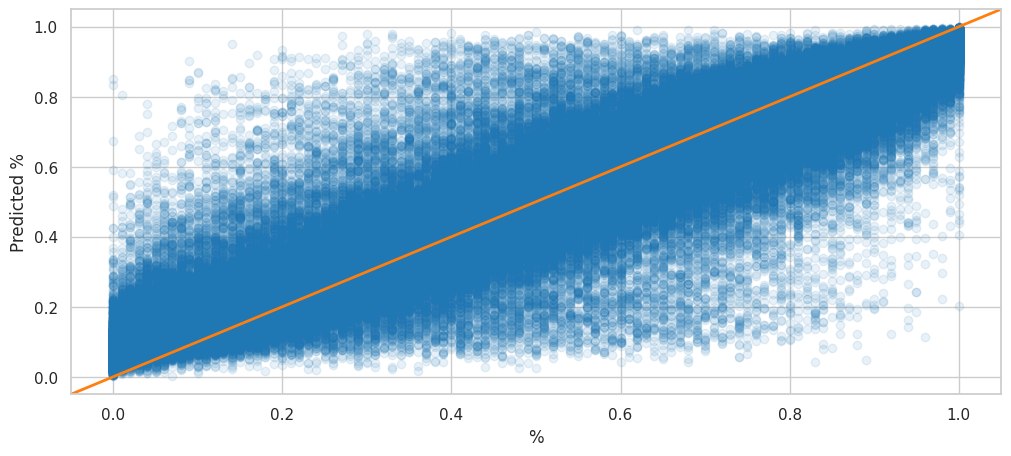

In [ ]:
plt.scatter(y_test, y_pred, c='C0', alpha=0.1)
plt.axline((0,0),(1,1), c='C1')
plt.xlabel('%')
plt.ylabel('Predicted %');
plt.show()

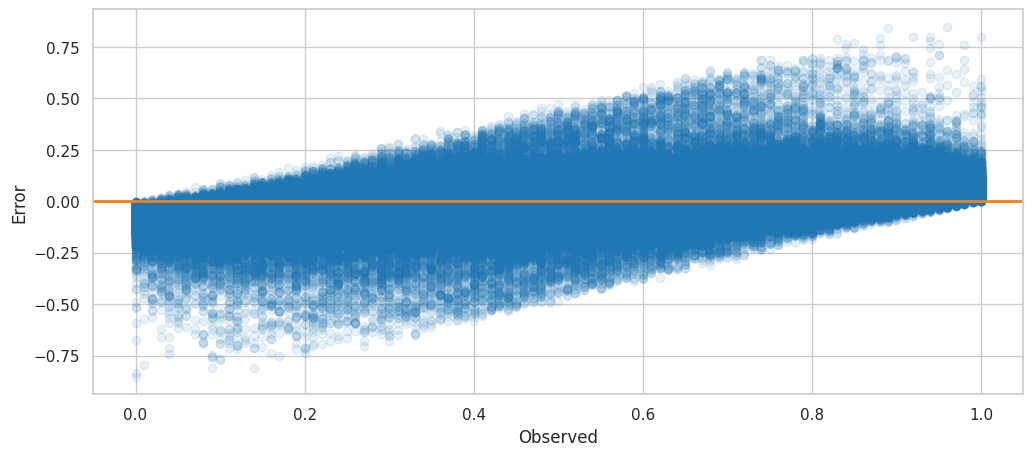

In [ ]:
# to check error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error, c='C0', alpha=0.1)
ax.axhline(c='C1')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

___
## Final model:
Here we will evaluate our model on the test_set.

In [ ]:
final_model = model

X_test_set = full_pipeline.fit_transform(test_set)
y_test_set = test_set['percentage_docks_available'].copy() #labels

final_predictions = final_model.predict(X_test_set)

In [ ]:
final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.10165488055958807

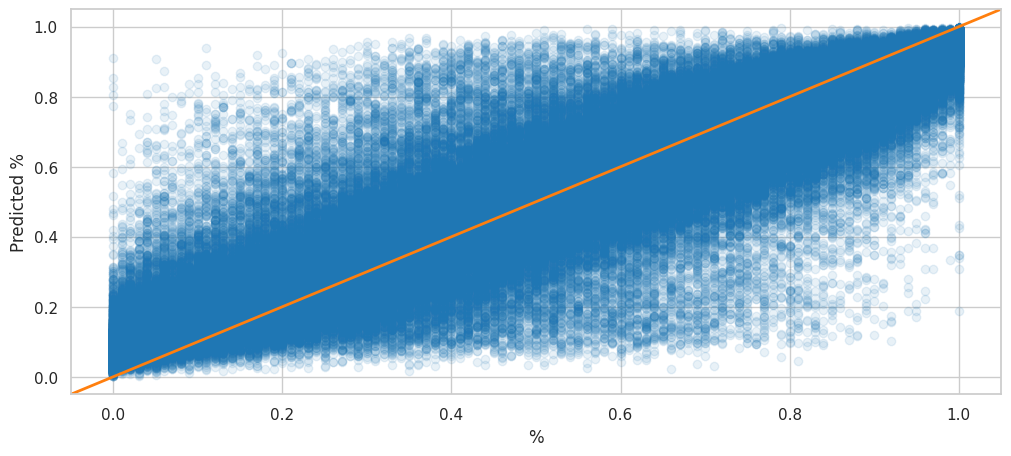

In [ ]:
plt.scatter(y_test_set, final_predictions, c='C0', alpha=0.1)
plt.axline((0,0),(1,1), c='C1')
plt.xlabel('%')
plt.ylabel('Predicted %');
plt.show()

___
## Data from Kaggle:
To predict the test set and generate the submission file

In [ ]:
kaggle_set = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/kaggle_set.csv')
kaggle_set

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,lat,lon,altitude,year,day_of_week,temp,prec,wind
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,41.387306,2.163126,25.0,2023,1,11.4,0.0,6.4
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449,41.398624,2.120494,117.0,2023,3,14.8,0.0,5.0
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852,41.396839,2.175660,21.0,2023,4,19.0,0.0,5.8
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111,41.405007,2.134603,114.0,2023,3,14.8,0.0,5.0
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160,41.402988,2.134469,106.0,2023,5,9.1,0.0,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54994,269,3,14,3,0.478261,0.478261,0.478261,0.478261,41.448152,2.192940,26.0,2023,1,16.9,0.0,6.9
54995,280,3,1,5,0.098765,0.074074,0.074074,0.077160,41.413866,2.177727,49.0,2023,2,6.1,0.0,5.3
54996,180,3,20,16,0.782680,0.821895,0.812092,0.777778,41.367557,2.138822,14.0,2023,0,12.6,0.0,3.3
54997,277,3,14,11,0.774691,0.953704,0.972222,0.472222,41.408211,2.168996,60.0,2023,1,16.9,0.0,6.9


In [ ]:
kaggle_set_labels = pd.merge(kaggle_set, labels, on='station_id', how='left')

In [ ]:
kaggle_set_labels.head()

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,lat,lon,altitude,year,day_of_week,temp,prec,wind,label
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,41.387306,2.163126,25.0,2023,1,11.4,0.0,6.4,0.0
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449,41.398624,2.120494,117.0,2023,3,14.8,0.0,5.0,3.0
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852,41.396839,2.175660,21.0,2023,4,19.0,0.0,5.8,1.0
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111,41.405007,2.134603,114.0,2023,3,14.8,0.0,5.0,3.0
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160,41.402988,2.134469,106.0,2023,5,9.1,0.0,6.1,3.0


In [ ]:
kaggle_set_labels['label'].unique()

array([ 0.,  3.,  1.,  4.,  2., nan])

In [ ]:
kaggle_set_labels[kaggle_set_labels['label'].isna()]['station_id'].unique()

array([143])

In [ ]:
#we check the map and the cluster model to manually complete the label for this station
kaggle_set_labels.loc[kaggle_set_labels['station_id']==143, ['label']] = 2.0

In [ ]:
kaggle_set_labels['label'] = kaggle_set_labels['label'].astype(int)

In [ ]:
kaggle_set_labels['prec'].unique()

array([0. , 1.4])

In [ ]:
kaggle_set_labels['prec'] = np.where(kaggle_set_labels['prec'] > 0, 1, 0)

In [ ]:
kaggle_set_labels['prec'].unique()

array([0, 1])

In [ ]:
kaggle_set_labels.head()

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,lat,lon,altitude,year,day_of_week,temp,prec,wind,label
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,41.387306,2.163126,25.0,2023,1,11.4,0,6.4,0
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449,41.398624,2.120494,117.0,2023,3,14.8,0,5.0,3
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852,41.396839,2.175660,21.0,2023,4,19.0,0,5.8,1
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111,41.405007,2.134603,114.0,2023,3,14.8,0,5.0,3
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160,41.402988,2.134469,106.0,2023,5,9.1,0,6.1,3


In [ ]:
X_kaggle_set = full_pipeline.fit_transform(kaggle_set_labels)

In [ ]:
final_predictions = final_model.predict(X_kaggle_set)

In [ ]:
df_output = pd.DataFrame(final_predictions)
df_output = df_output.reset_index()
df_output.columns = ['index','percentage_docks_available']
df_output

,index,percentage_docks_available
0,0,0.789284
1,1,0.676797
2,2,0.575961
3,3,0.730942
4,4,0.837031
...,...,...
54994,54994,0.480002
54995,54995,0.155592
54996,54996,0.744938
54997,54997,0.553250


In [ ]:
path = '/content/drive/My Drive/CapstoneProject_NathyDani/submission7_NathaliayDaniela_rforest_230627(7).csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_output.to_csv(f, index=False)